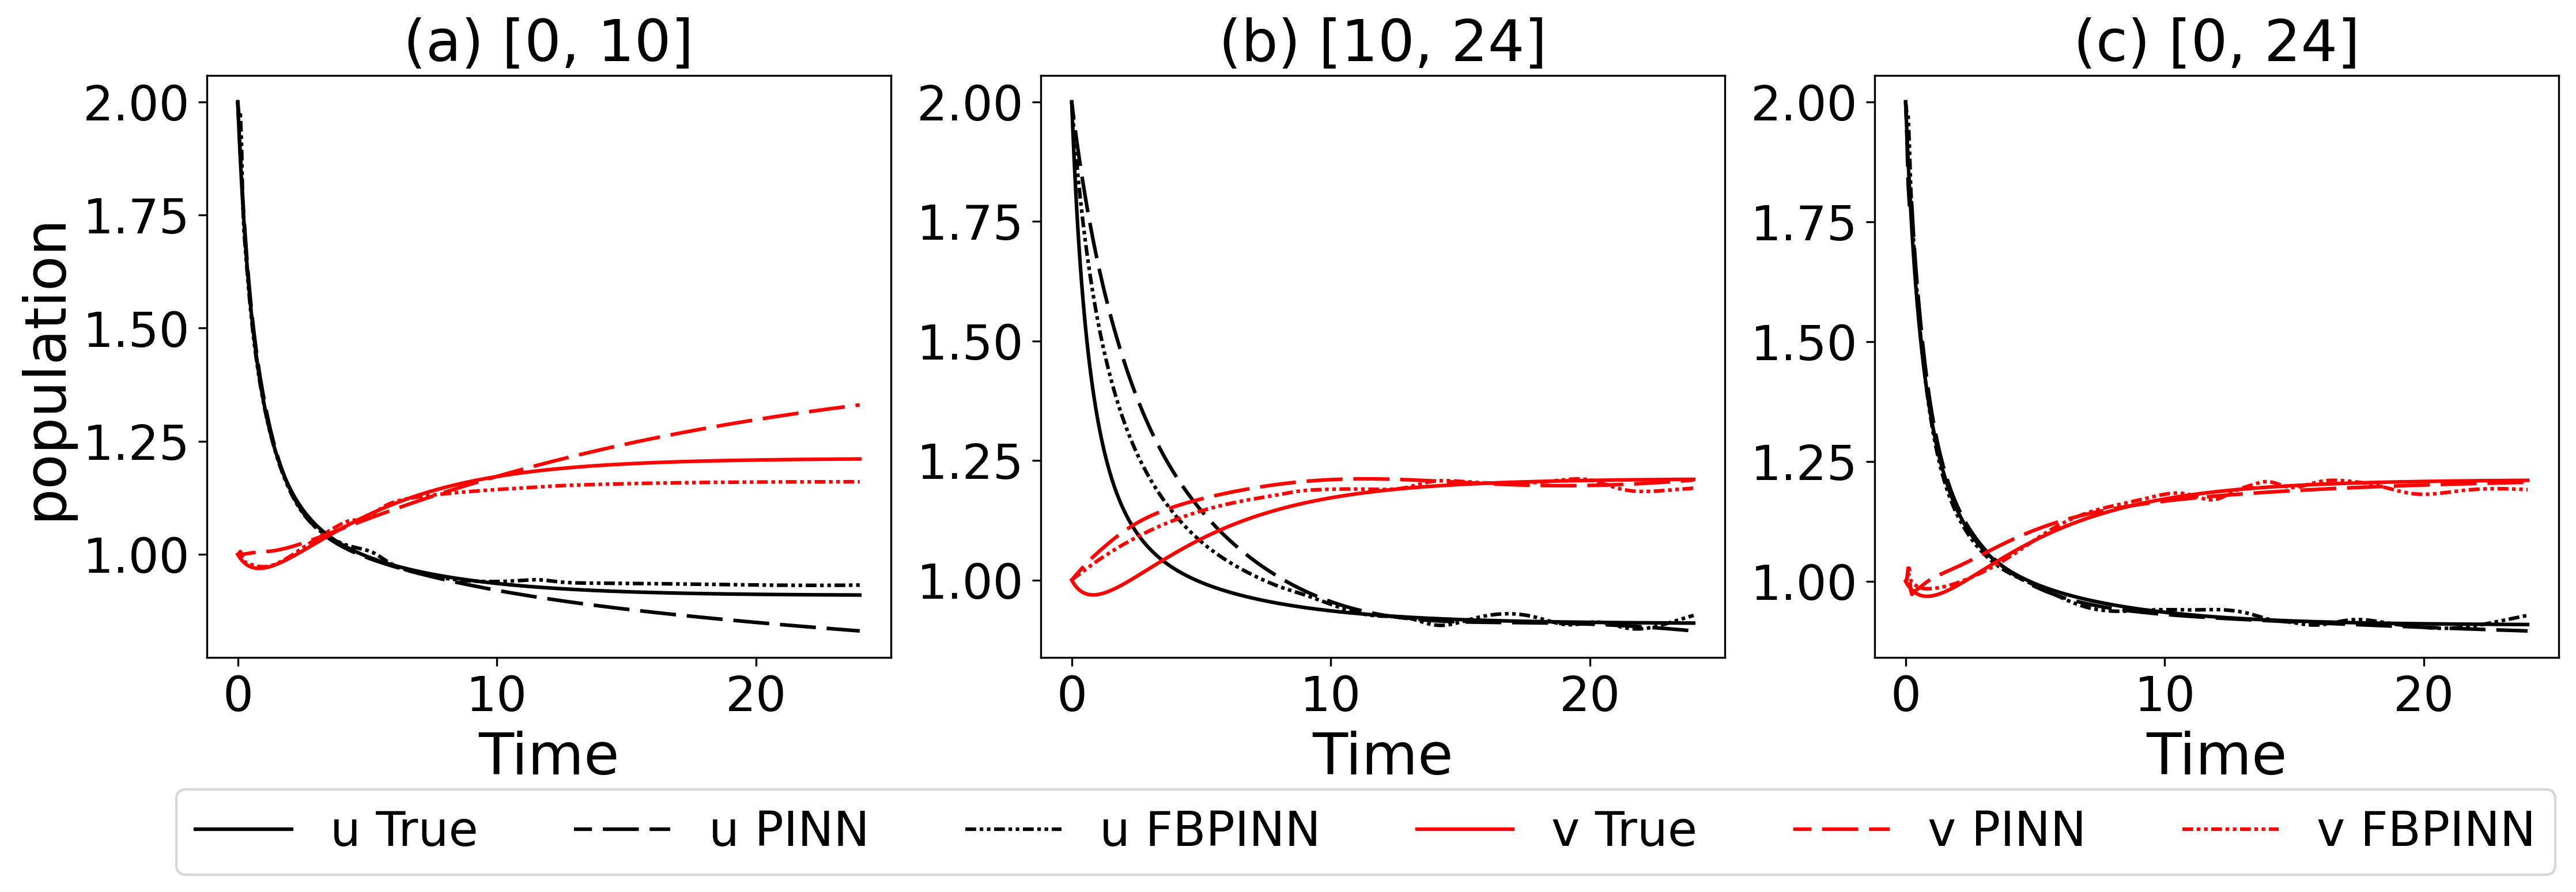

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import tikzplotlib

time_limits = [[0,10], [10,24], [0,24]]
all_fig_tags = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)', '(g)', '(h)', '(i)']
labels = ["u", "v"]
colors = ['black', 'red', 'blue']

fig_sciann_vs_fbpinns, ax_sciann_vs_fbpinns = plt.subplots(1, 3, figsize=(15, 5), dpi=300)

for tl in time_limits:
    sciann_path = os.path.join("coexistence_sciann", f"SciANN_CM_coexistence_actf_tanh_l_5x5x5_nD_100_bs_300_e_50000_lr_0.001_tl_{tl[0]}-{tl[1]}_nl_0.05_nC_200_nT_500_")
    sciann_pred_solution = np.loadtxt(sciann_path + '/' + "res_t_u_v_pred.csv", delimiter=',', skiprows=1)

    fbpinn_path = os.path.join("coexistence", f"summaries/FBPINN_coexistence_{tl[0]}_{tl[1]}")
    fbpinn_pred_solution = np.loadtxt(fbpinn_path + '/' + "res_u_v_pred.csv", delimiter=',', skiprows=1)
    x_batch = np.loadtxt(fbpinn_path + '/' + "res_x_batch.csv", delimiter=',', skiprows=1)
    u_exact = np.loadtxt(fbpinn_path + '/' + "res_u_exact.csv", delimiter=',', skiprows=1)

    assert fbpinn_pred_solution.shape[0] == x_batch.shape[0] == u_exact.shape[0]
    assert fbpinn_pred_solution.shape[1] == u_exact.shape[1] == 2
    assert sciann_pred_solution.shape[1] - 1 == fbpinn_pred_solution.shape[1]

    for i in range(0, u_exact.shape[1]):
        ax_sciann_vs_fbpinns[time_limits.index(tl)].plot(x_batch, u_exact[:,i], label=f"{labels[i]} True", linestyle='-', color=colors[i])
        ax_sciann_vs_fbpinns[time_limits.index(tl)].plot(x_batch, sciann_pred_solution[:,i+1], label=f"{labels[i]} PINN", linestyle=(5, (10, 3)), color=colors[i])
        ax_sciann_vs_fbpinns[time_limits.index(tl)].plot(x_batch, fbpinn_pred_solution[:,i], label=f"{labels[i]} FBPINN", linestyle=(0, (3, 1, 1, 1, 1, 1)), color=colors[i])


    ax_sciann_vs_fbpinns[time_limits.index(tl)].set_title(f'{all_fig_tags[time_limits.index(tl)]} {tl}', fontsize=24)
    ax_sciann_vs_fbpinns[time_limits.index(tl)].set_xlabel('Time', fontsize=24)

    ax_sciann_vs_fbpinns[time_limits.index(tl)].tick_params(axis='x', labelsize=20)
    ax_sciann_vs_fbpinns[time_limits.index(tl)].tick_params(axis='y', labelsize=20)

ax_sciann_vs_fbpinns[0].set_ylabel('population', fontsize=24)
handles, labels = ax_sciann_vs_fbpinns[1].get_legend_handles_labels()
fig_sciann_vs_fbpinns.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.53, -0.05), ncol=6, fontsize=20)
plt.tight_layout(rect=[0, 0.05, 1, 1])

tikzplotlib.save("sciann_vs_fbpinns_model_comparison(coexistence).tex")

plt.savefig("sciann_vs_fbpinns_model_comparison(coexistence).png")